In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("../data/AmesHousing.csv")

# Step 3: Display basic info
print(df.shape)
print(df.columns)
df.head()


(2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:

# Select top 20 features
selected_columns = [
    'SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Roof Style', 'Total Bsmt SF',
    '1st Flr SF', 'Year Built', 'Full Bath', 'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area',
    'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage',
    'Kitchen Qual', 'Exter Qual', 'Bsmt Qual', 'Neighborhood', 'Sale Condition'
]

df = df[selected_columns]


In [4]:
# Show columns with missing values
missing = df.isnull().sum()
missing[missing > 0]
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SalePrice,2930.0,180796.060068,79886.692357,12789.0,129500.00,160000.0,213500.00,755000.0
Overall Qual,2930.0,6.094881,1.411026,1.0,5.00,6.0,7.00,10.0
Gr Liv Area,2930.0,1499.690444,505.508887,334.0,1126.00,1442.0,1742.75,5642.0
Garage Cars,2929.0,1.766815,0.760566,0.0,1.00,2.0,2.00,5.0
Total Bsmt SF,2929.0,1051.614544,440.615067,0.0,793.00,990.0,1302.00,6110.0
1st Flr SF,2930.0,1159.557679,391.890885,334.0,876.25,1084.0,1384.00,5095.0
Year Built,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
Full Bath,2930.0,1.566553,0.552941,0.0,1.00,2.0,2.00,4.0
Year Remod/Add,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
Garage Yr Blt,2771.0,1978.132443,25.528411,1895.0,1960.00,1979.0,2002.00,2207.0


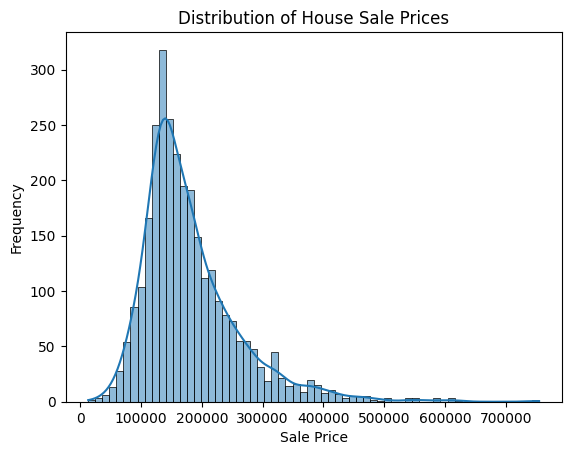

In [5]:
#sales price distribution
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of House Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


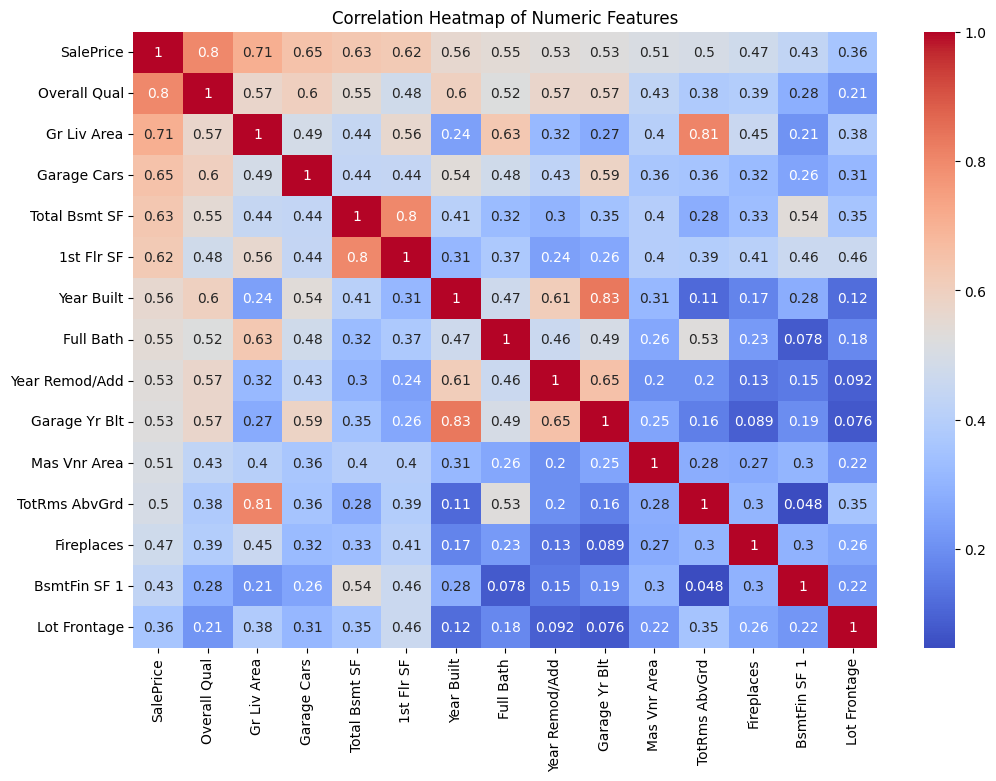

In [6]:
#Correlation heatmap (numeric features)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


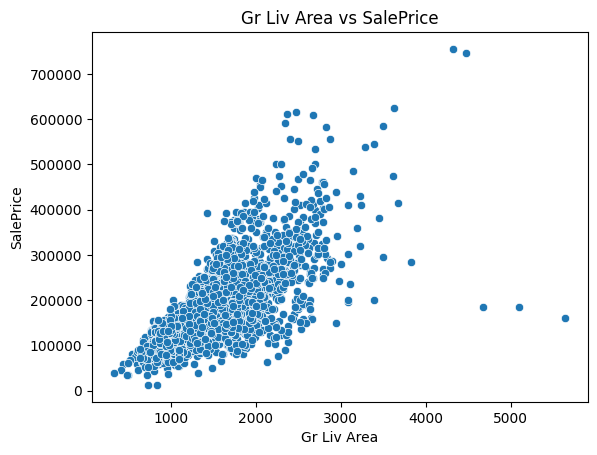

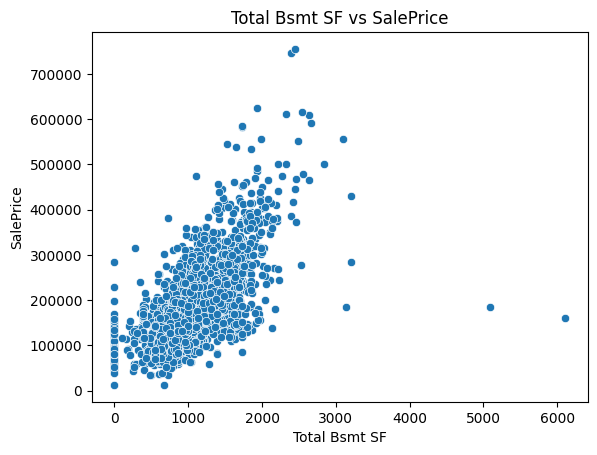

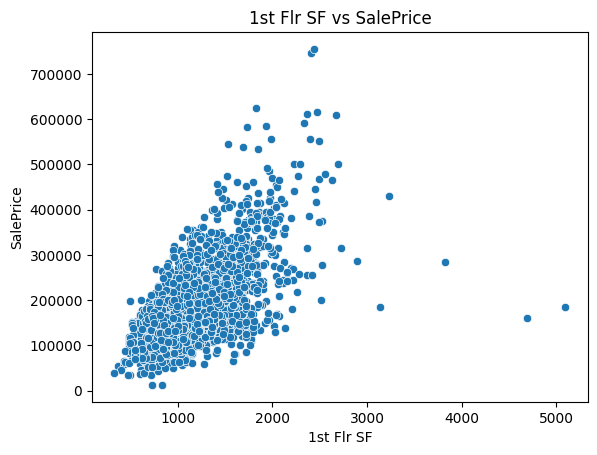

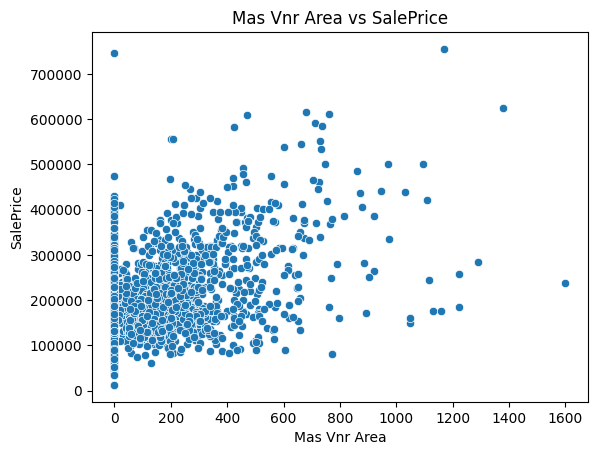

In [7]:
#Scatter plots for important numeric features
important_nums = ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Mas Vnr Area']

for feature in important_nums:
    sns.scatterplot(x=feature, y='SalePrice', data=df)
    plt.title(f'{feature} vs SalePrice')
    plt.show()


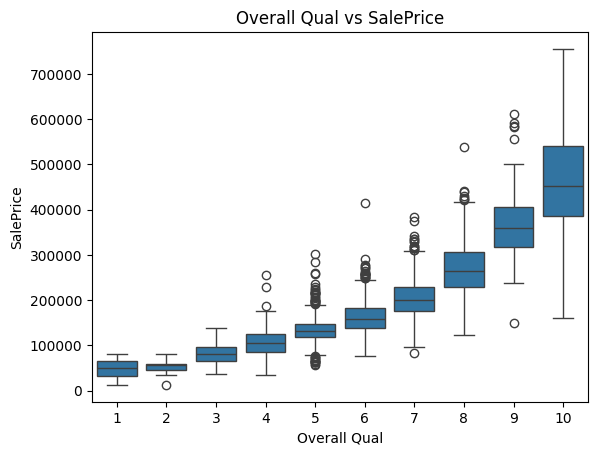

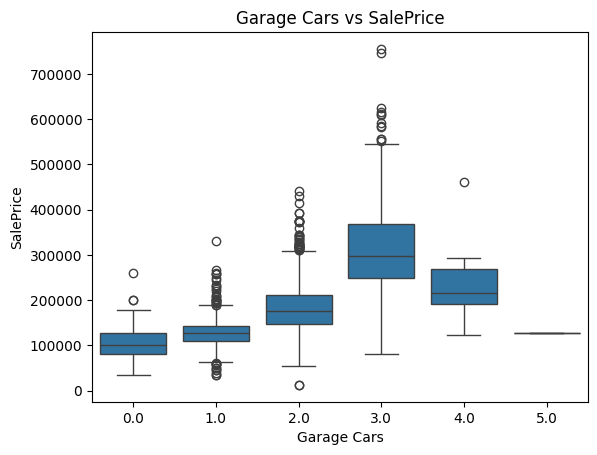

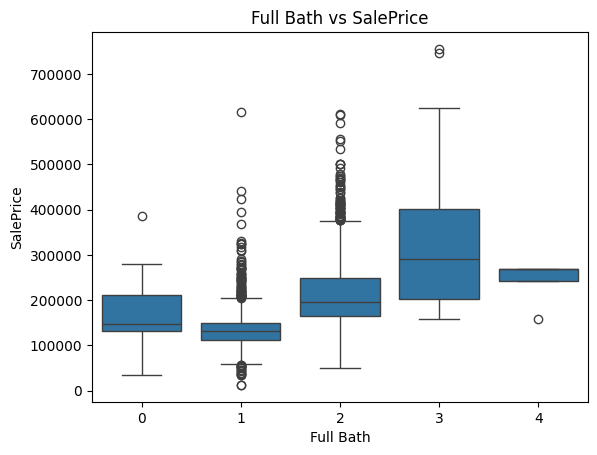

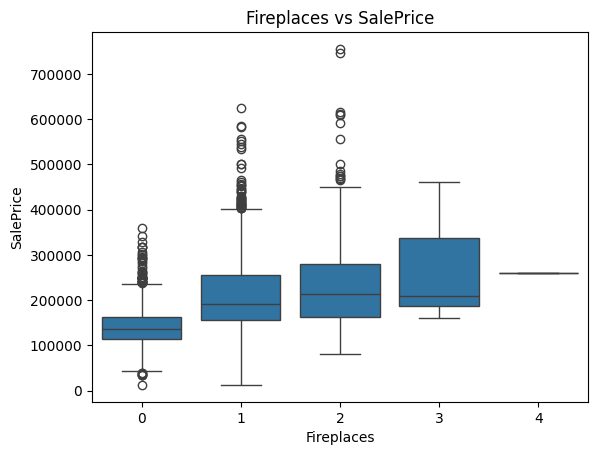

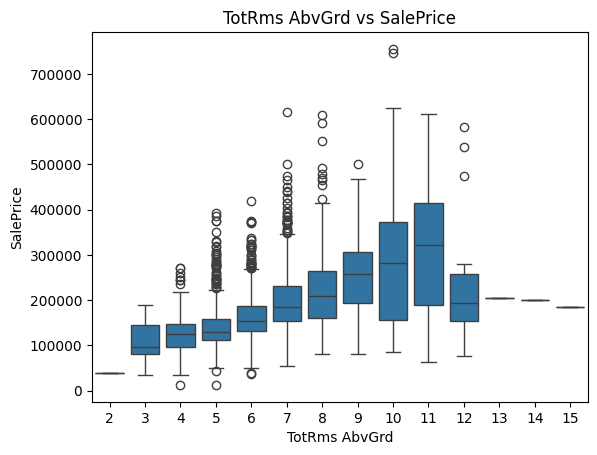

In [8]:
#Box plots for categorical features
cat_features = ['Overall Qual', 'Garage Cars', 'Full Bath', 'Fireplaces','TotRms AbvGrd',]

for feature in cat_features:
    sns.boxplot(x=feature, y='SalePrice', data=df)
    plt.title(f'{feature} vs SalePrice')
    plt.show()


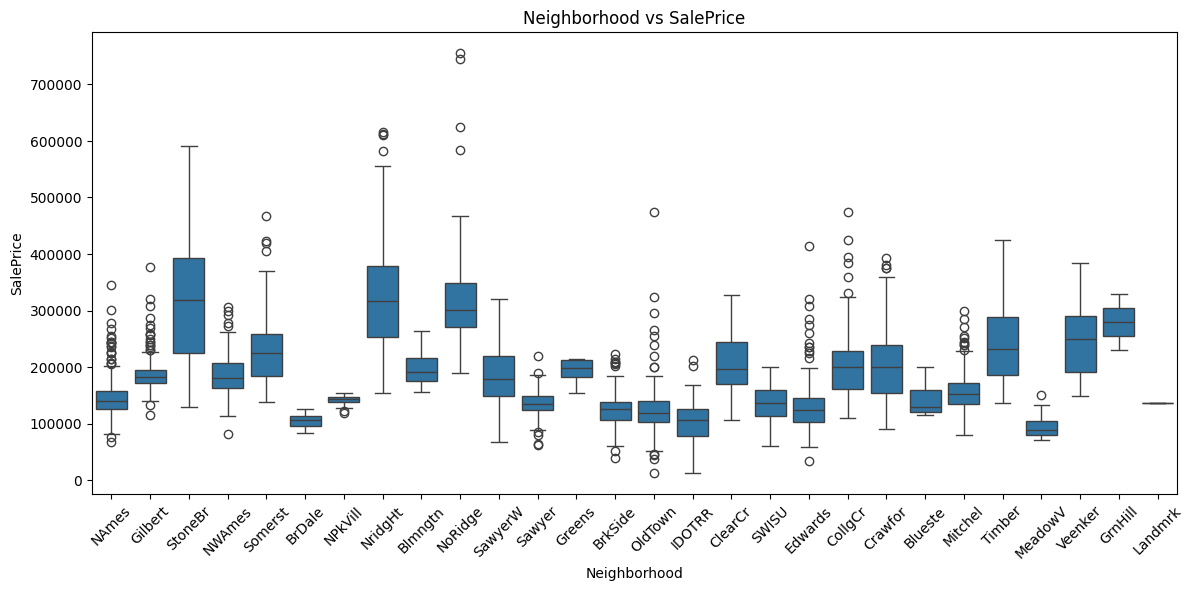

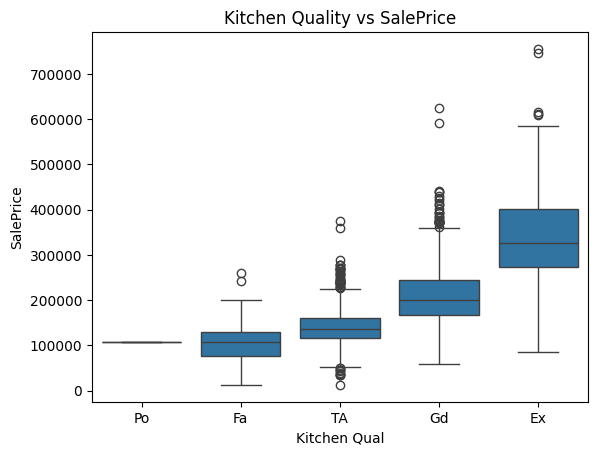

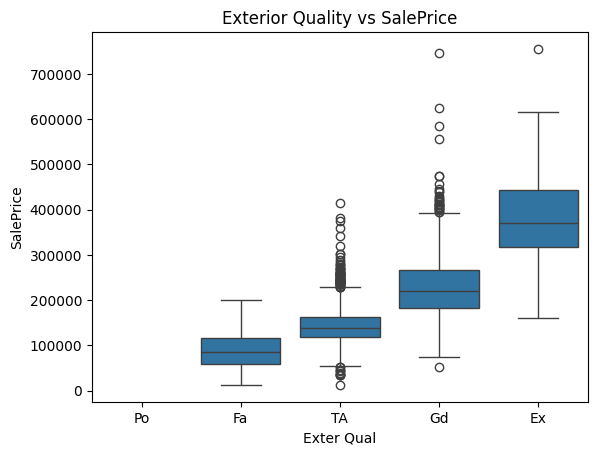

In [9]:
# Neighborhood vs SalePrice
plt.figure(figsize=(14,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title("Neighborhood vs SalePrice")
plt.show()

# Kitchen Quality
sns.boxplot(x='Kitchen Qual', y='SalePrice', data=df, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title("Kitchen Quality vs SalePrice")
plt.show()

# Exterior Quality
sns.boxplot(x='Exter Qual', y='SalePrice', data=df, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title("Exterior Quality vs SalePrice")
plt.show()


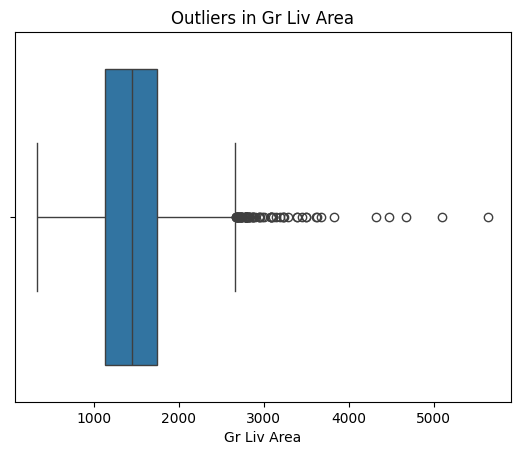

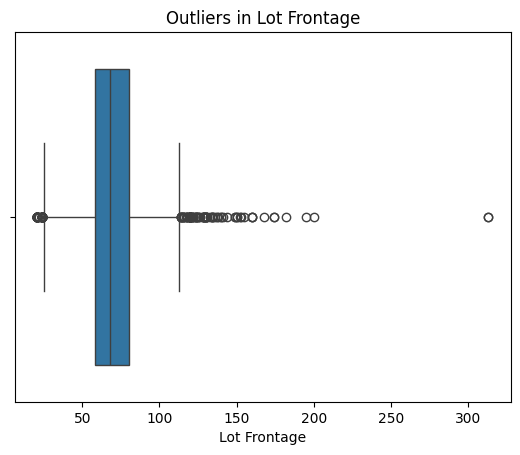

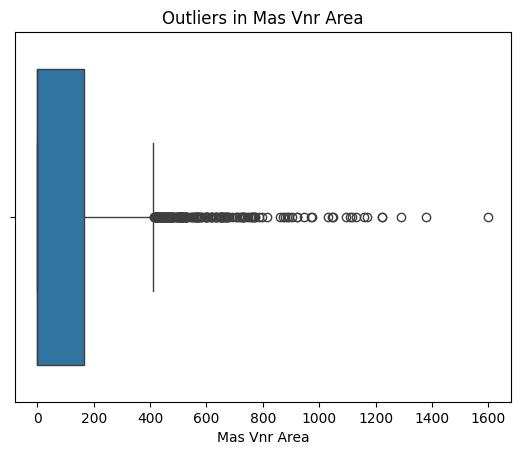

In [10]:


# Boxplot to spot outliers
features_with_outliers = ['Gr Liv Area', 'Lot Frontage', 'Mas Vnr Area']

for feature in features_with_outliers:
    sns.boxplot(data=df, x=feature)
    plt.title(f"Outliers in {feature}")
    plt.show()


In [11]:
# Calculate skewness for selected features
skewed = df[['SalePrice', 'Gr Liv Area', 'Total Bsmt SF', 'Lot Frontage']].skew()
print("Skewness:\n", skewed)


Skewness:
 SalePrice        1.743500
Gr Liv Area      1.274110
Total Bsmt SF    1.156204
Lot Frontage     1.499067
dtype: float64
